### Your Name: Barbara Karakyriakou
### CSCI E-29

## Question 1: Engineer
### 5 points (1 + 2 + 1)

I pickled you a dataframe object and saved it as areas.pkl
Pickling is a very useful tool in Python.  You can save the state of any object with pickling and load it back in the exact same state.  i.e. I can pickle a dictionary and send it to you in an email, you can unpickle it and it will be a ready to use dictionary.
Many of you know this from my previous class E7, but you probably don't know that pandas has a convenient way to pickle and unpickle dataframes.  Learn about this and load the areas.pkl into a dataframe called areas.

In [1]:
import pandas as pd
import pickle
import random 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Question 1.1
### 1 point
Load the areas.pkl file into a dataframe and examine the head of the df.

In [2]:
#your code here
areas = pd.read_pickle('areas.pkl', compression='infer')
areas.head()

,areas,lab_areas
0,Area 5,5
1,Area 6,6
2,Area 8,8
3,Area 8,8
4,Area 7,7


### Question 1.2

It looks like I tried to engineer a feature called lab_areas from areas.  Why can I not use this feature as is?
### 2 points

YOUR ANSWER: It looks like each area is represented by its numerical value in the lab_areas column, which can lead into making arithmetic calculations on the data that will make no sense, or that we are not interested in learning.

### Question 1.3
### 2 points
Fix this problem that lab_areas has.  
Note: Use the tool that you think is best to fix this and do not discuss on Piazza.
Output the head of your fixed dataframe.

In [3]:
### YOUR CODE HERE
areas = pd.get_dummies(areas['areas'], drop_first=True)
areas.head()

,Area 10,Area 2,Area 3,Area 4,Area 5,Area 6,Area 7,Area 8,Area 9
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0


## Question 2 KMeans

### 10 points (1 + 1 + 1 + 1 + 1 + 2.5 + 2.5)

I randomly generated two feature data, created an ndarray and dumped the data in the file "random.pkl" using the following command:
https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.ndarray.dump.html

### Question 2.1
### 1 point
random.pkl is an nd array.
Load it back and assign it to the variable data.

In [4]:
#YOUR CODE HERE
data = pickle.load(open('random.pkl', 'rb'))

### Question 2.2
### 1  points
Using the seaborn library violin plots, plot data.

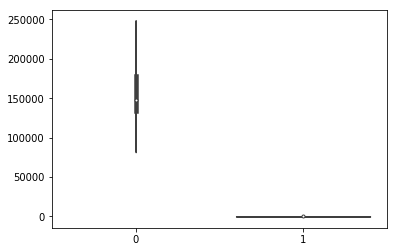

In [5]:
# Use the Seaborn library to visualize the data using a violin plot

sns.violinplot(data=data)

### Question 2.3
### 1  point
Why shouldn't we use the data as is to do K-means clustering?

YOUR ANSWER: They are in different scales, and we may get biased results since K-means clustering is based on distances. For example, one measure that is used for similarity between objects is Euclidean Distance. In this example, with the data being in two different scales there is a risk that the same importance will not be given to all the data, therefore it is necessary to bring them in the same scale before we apply K-means clustering.

### Question 2.4
### 1  point
Use a Standard Scaler to scale data and asign the scaled data to a variable called scaled

In [6]:
#YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data= scaler.fit_transform(data)

### Question 2.5
### 1  point
Use the same code as above on the scaled data.  If you rescaled it succesfully, your features should be on the same scale and you should now be ready for the next step.

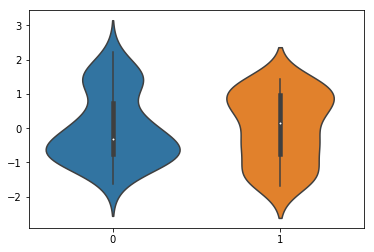

In [7]:
sns.violinplot(data=scaled_data)

### Question 2.6
### 2.5  points
I want to cluster the data but don't know which K to pick.  Figure out a way to choose K.
What is your K and Why?

#Hint: Use your scaled data.

#### YOUR ANSWER HERE: Using the elbow graph method, I plotted the inertia and distortion values (sum of square distances and sum of square euclidean distances respectively of each point to each cluster center) against cluster counts from 1 to 15. Both graphs demonstrate a relatively sharp inflection at 4 clusters, therefore K must be 4.

USE THE FOLLOWING CODE CELL TO GET TO YOUR ANSWER.

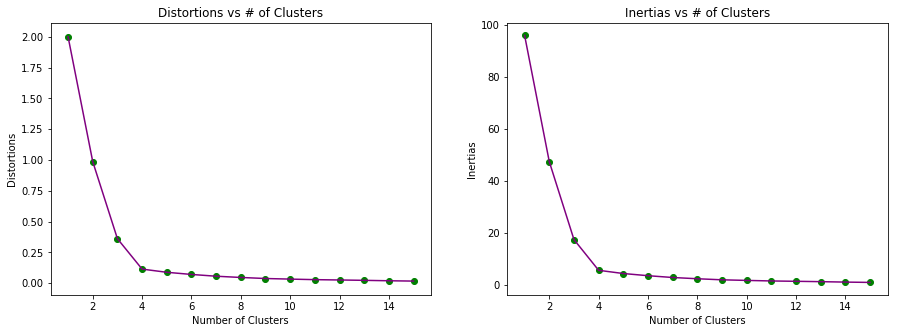

In [8]:
#YOUR CODE HERE
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

n_clust = range(1,16)

#list comprehension to get the kmeans list of each cluster count
kmeans = [KMeans(n_clusters=i).fit(scaled_data) for i in n_clust] 
#list comprehension to get the list of centroids for each kmeans
centroids = [kmeans[i].cluster_centers_ for i in range(0,len(kmeans))] 

#loop to calculate the distortions for each cluster count
distortions = []
for i in range(0,len(kmeans)):
    distortions.append(sum(np.min(cdist(scaled_data, centroids[i], 'sqeuclidean'), axis=1)) \
                       / scaled_data.shape[0])

# list comprehension to get the list of inertias for each cluster count   
inertias =  [kmeans[i].inertia_ for i in range(0,len(kmeans))]

# plot side by side the cluster counts against the distortions and against the inertias 
# to visualize the "elbow" graph and locate the nubler of cluster were the inflection is rather sharp 

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.scatter(n_clust,distortions, color = "green")
plt.plot(n_clust, distortions, color = "purple")
# plot Labels
plt.title("Distortions vs # of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Distortions")


plt.subplot(1,2,2)
plt.scatter(n_clust,inertias, color = "green")
plt.plot(n_clust, inertias, color = "purple")
# plot Labels
plt.title("Inertias vs # of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertias") 

plt.show()

### Question 2.7
### 2.5  points

Let's see if you picked correctly.  

Use KMeans clustering with the number of clusters you decided to pick.

Use Matplotlib to display your scaled data and set c to be equal to your model.labels_

Display the plot.

How many clusters do you observe? 4


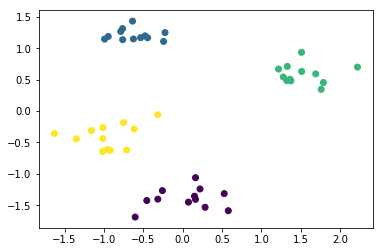

In [9]:
#YOUR CODE HERE
km = KMeans(n_clusters=4)
labels = km.fit_predict(scaled_data)

plt.scatter(scaled_data[:,0], scaled_data[:,1], c=labels)
plt.show()

## Question 3 Is my Blue German SUV safe?
### 5 points

Load the stolen.csv file in a dataframe called stolen.
Here we have some simple data records on stolen cars.
I happen to drive a Blue German SUV.  Will it get stolen or am I safe?

Hint: This is a Bayesian problem, you don't have to do it by hand.  A clever quick manipulation makes this particularly suitable for one of the Bayesian classifiers. No need to train test split, just train and predict.
You will get full credit if you do it by hand too.

YOUR ANSWER HERE:

In [10]:
#Load the stolen dataset here
#YOUR CODE HERE
stolen  = pd.read_csv('stolen.csv')
stolen

,color,type,make,stolen
0,Blue,Turbo,German,Yes
1,Blue,Turbo,German,No
2,Blue,Turbo,German,Yes
3,Yellow,Turbo,German,No
4,Yellow,Turbo,Italian,Yes
5,Yellow,SUV,Italian,No
6,Yellow,SUV,Italian,Yes
7,Yellow,SUV,German,No
8,Blue,SUV,Italian,No
9,Blue,Turbo,Italian,Yes


In [11]:
#Transform your data (if you want)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
stolen['color_code'] = le.fit_transform(stolen['color'])
stolen['type_code'] = le.fit_transform(stolen['type'])
stolen['make_code'] = le.fit_transform(stolen['make'])
stolen.stolen = stolen.stolen.map(dict(Yes=1, No=0))
stolen

,color,type,make,stolen,color_code,type_code,make_code
0,Blue,Turbo,German,1,0,1,0
1,Blue,Turbo,German,0,0,1,0
2,Blue,Turbo,German,1,0,1,0
3,Yellow,Turbo,German,0,1,1,0
4,Yellow,Turbo,Italian,1,1,1,1
5,Yellow,SUV,Italian,0,1,0,1
6,Yellow,SUV,Italian,1,1,0,1
7,Yellow,SUV,German,0,1,0,0
8,Blue,SUV,Italian,0,0,0,1
9,Blue,Turbo,Italian,1,0,1,1


In [12]:
#Train a classifier and use it to predict if a Blue German SUV will get stolen (if you want)
from sklearn.naive_bayes import BernoulliNB

clf_BNB = BernoulliNB()
clf_BNB.fit(stolen.iloc[:,4:], stolen.stolen)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [13]:
# I am creating a single row dataframe with the value codes for a Blue German SUV.
# I will pass it to my classifier to predict if it will get stolen or not.
bgs = {'color_code': [0], 'type_code': [0], 'make_code': [0]}
BGS = pd.DataFrame(data=bgs)
BGS

,color_code,make_code,type_code
0,0,0,0


In [14]:
stolen_code = clf_BNB.predict(BGS)
stolen_code

array([0])

#### I used the BernoulliNB Naive Bayes Classifiers and the prediction is that the Blue German SUV will not get stolen. I will solve this by hand too, to reconfirm this answer.

I will use the Naive Bayesian classifier formula to calculate the posterior probability. 

\begin{equation*}
p(\text{L |  features})   = \frac{p(\text{features | L}) \times p(\text{L})}{p(\text{features})}
\end{equation*}

features = Blue, German, SUV
<br>L = Yes, No

Probability Yes:\begin{equation*}
p(\text{Yes |  features})   = \frac{p(\text{Blue | Yes}) \times p(\text{German | Yes})\times p(\text{SUV | Yes})\times p(\text{Yes})}{p(\text{features})}
\end{equation*}

Probability No:\begin{equation*}
p(\text{No |  features})   = \frac{p(\text{Blue | No}) \times p(\text{German | No})\times p(\text{SUV | No})\times p(\text{No})}{p(\text{features})}
\end{equation*}

Probability Yes:\begin{equation*}
p(\text{Yes |  features})   = \frac{(\text{3/5}) \times (\text{2/5})\times (\text{1/5})\times (\text{5/10})}{p(\text{features})}
\end{equation*}

Probability No:\begin{equation*}
p(\text{No |  features})   = \frac{(\text{2/5}) \times (\text{3/5})\times (\text{3/5})\times (\text{5/10})}{p(\text{features})}
\end{equation*}

Probability Yes:\begin{equation*}
p(\text{Yes |  features})   = \frac{(\text{0.024})}{p(\text{features})}
\end{equation*}

Probability No:\begin{equation*}
p(\text{No |  features})   = \frac{(\text{0.072})}{p(\text{features})}
\end{equation*}

Probability Yes:\begin{equation*}
p(\text{Yes |  features})   = \frac{(\text{0.024})}{p(\text{features})}
\end{equation*}

Probability No:\begin{equation*}
p(\text{No |  features})   = \frac{(\text{0.072})}{p(\text{features})}
\end{equation*}

Probability Yes:\begin{equation*}
p(\text{Yes |  features})   = \frac{(\text{0.024})}{(\text{0.024+0.072})}
\end{equation*}

Probability No:\begin{equation*}
p(\text{No |  features})   = \frac{(\text{0.072})}{(\text{0.024+0.072})}
\end{equation*}

Probability Yes:\begin{equation*}
p(\text{Yes |  features})   = \frac{(\text{0.024})}{(\text{0.096})}
\end{equation*}

Probability No:\begin{equation*}
p(\text{No |  features})   = \frac{(\text{0.072})}{(\text{0.096})}
\end{equation*}

Probability Yes:\begin{equation*}
p(\text{Yes |  features})   = (\text{0.025})
\end{equation*}

Probability No:\begin{equation*}
p(\text{No |  features})   = (\text{0.075})
\end{equation*}

#### Since 0.075 > 0.025, the likelihood of a Blue German SUV to get stolen is classified as 'NO'.